In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# Data import

In [3]:
chunk_size = 100000
sample_size_percent = 5

data = pd.DataFrame()

for chunk in pd.read_csv("./datas/en.openfoodfacts.org.products.csv", sep="\t", nrows=None, chunksize=chunk_size):
    actual_chunk_size = chunk.shape[0]
    random_size = int(actual_chunk_size * (sample_size_percent / 100))
    random_indexes = np.random.default_rng().choice(chunk.index, size=random_size, replace=False)
    chunk = chunk.loc[random_indexes]
    data = pd.concat([data, chunk])
    del chunk

data.shape

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_as

(95365, 186)

## Dataset overview

In [4]:
rows_nb, cols_nb = data.shape

In [5]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
63057,30034104399,http://world-en.openfoodfacts.org/product/0030...,usda-ndb-import,1489073243,2017-03-09T15:27:23Z,1587586139,2020-04-22T20:08:59Z,Breakfast Made With Whole Grains Biscuits,NaN,NaN,NaN,NaN,NaN,NaN,Giant Eagle Inc.,giant-eagle-inc,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuits",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Whole grain blend (rye flakes, rolled oats, oa...",NaN,NaN,NaN,NaN,NaN,"1 PACK, 4 BISCUITS (50 g)",50.0,NaN,4.0,NaN,"en:e322,en:e322i,en:e450,en:e450i,en:e472e,en:...","E322 - Lecithins,E322i - Lecithin,E450 - Dipho...",0.0,NaN,NaN,0.0,NaN,NaN,9.0,c,4.0,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutri

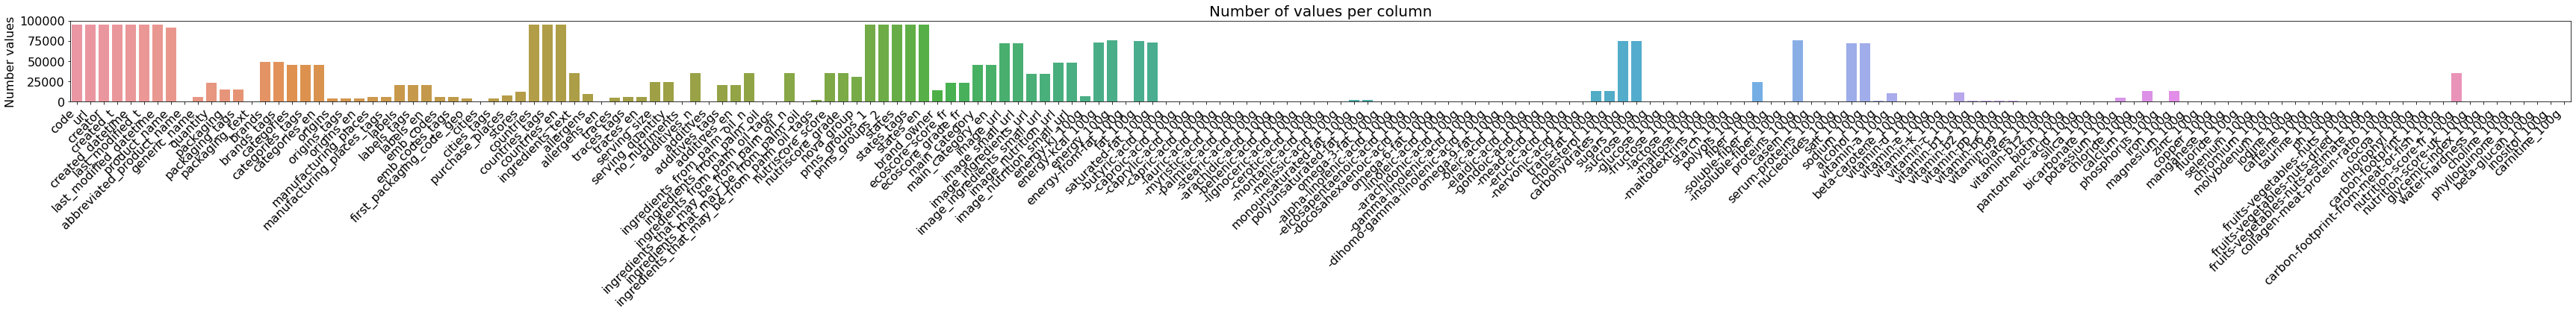

In [6]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# Feature analysis

In [7]:
features = []

## General informations

In [8]:
general_infos = data.loc[:, "code":"quantity"]

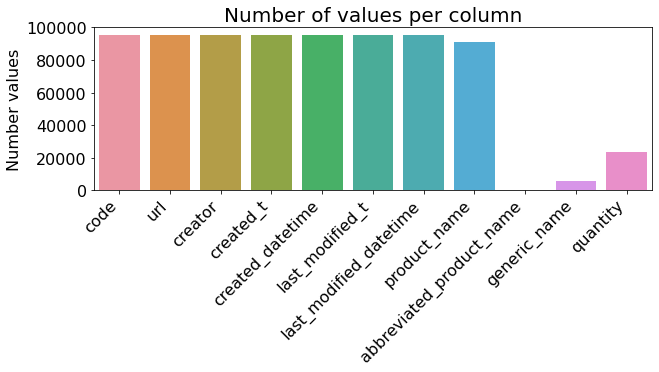

In [9]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [10]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
63057,30034104399,http://world-en.openfoodfacts.org/product/0030...,usda-ndb-import,1489073243,2017-03-09T15:27:23Z,1587586139,2020-04-22T20:08:59Z,Breakfast Made With Whole Grains Biscuits,NaN,NaN,NaN
74972,35826088185,http://world-en.openfoodfacts.org/product/0035...,org-database-usda,1587644548,2020-04-23T12:22:28Z,1587644549,2020-04-23T12:22:29Z,Supreme crispy thin crust pizza,NaN,NaN,NaN
95808,41190050925,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489056370,2017-03-09T10:46:10Z,1587573798,2020-04-22T16:43:18Z,"Shoprite, original french fried onions",NaN,NaN,NaN
20478,0013000013673,http://world-en.openfoodfacts.org/product/0013...,inf,1600525817,2020-09-19T14:30:17Z,1600525862,2020-09-19T14:31:02Z,Heinz,NaN,NaN,NaN
14740,11213017198,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489068705,2017-03-09T14:11:45Z,1587582182,2020-04-22T19:03:02Z,"Spartan, diced tomatoes",NaN,NaN,NaN


In [11]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 63057 to 1906514
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      95365 non-null  object
 1   url                       95365 non-null  object
 2   creator                   95365 non-null  object
 3   created_t                 95365 non-null  int64 
 4   created_datetime          95365 non-null  object
 5   last_modified_t           95365 non-null  int64 
 6   last_modified_datetime    95365 non-null  object
 7   product_name              91299 non-null  object
 8   abbreviated_product_name  359 non-null    object
 9   generic_name              5913 non-null   object
 10  quantity                  23736 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.7+ MB


### Redundancy: product_name, abbreviated_product_name, generic_name

In [12]:
general_infos[general_infos.generic_name.notna()].product_name.isna().sum()

12

We can see that 'abbreviated_product_name' contains too fews entries to be usefull.  
Regarding the 'generic_name', the fill percentage is not very high, but worst, each time 'generic_name' is filled, so is 'product_name'.

#### Conclusion
Only 'product_name' feature is usefull

In [67]:
general_infos_features = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "quantity"
]

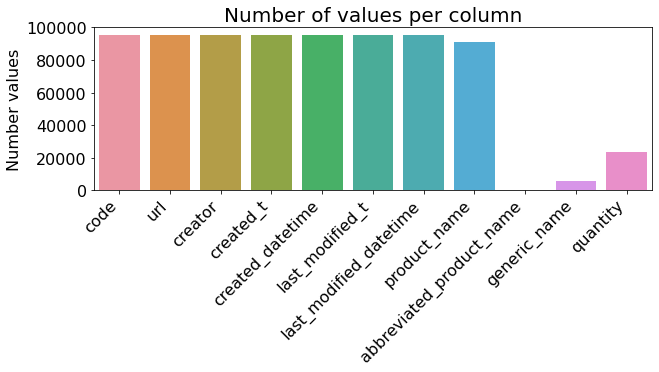

In [81]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

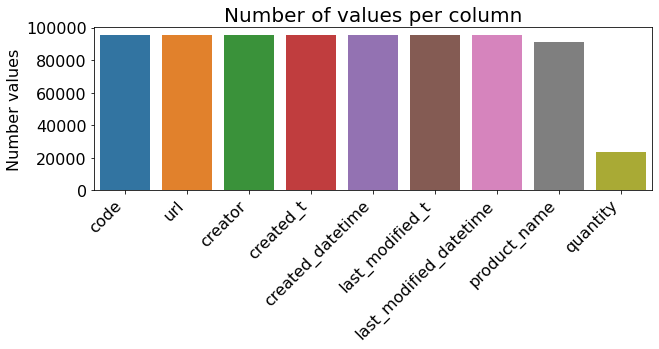

In [69]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos[general_infos_features].columns, y=general_infos[general_infos_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Tags

In [14]:
tags = data.loc[:, "packaging":"countries_en"]

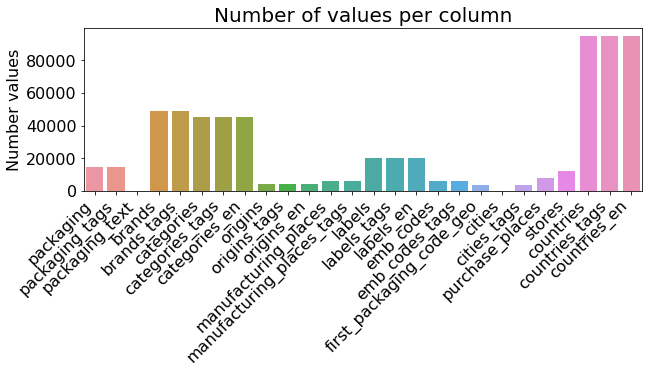

In [15]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [16]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
63057,NaN,NaN,NaN,Giant Eagle Inc.,giant-eagle-inc,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuits",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
74972,NaN,NaN,NaN,NaN,NaN,"Meals, Pizzas pies and quiches, Pizzas","en:meals,en:pizzas-pies-and-quiches,en:pizzas","Meals,Pizzas pies and quiches,Pizzas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
95808,NaN,NaN,NaN,Shoprite,shoprite,"Groceries, Sauces","en:groceries,en:sauces","Groceries,Sauces",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
20478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:United States,en:united-states,United States
14740,NaN,NaN,NaN,Spartan,spartan,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States


In [17]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 63057 to 1906514
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  15028 non-null  object
 1   packaging_tags             15026 non-null  object
 2   packaging_text             256 non-null    object
 3   brands                     49297 non-null  object
 4   brands_tags                49294 non-null  object
 5   categories                 45266 non-null  object
 6   categories_tags            45266 non-null  object
 7   categories_en              45266 non-null  object
 8   origins                    4134 non-null   object
 9   origins_tags               4128 non-null   object
 10  origins_en                 4128 non-null   object
 11  manufacturing_places       6010 non-null   object
 12  manufacturing_places_tags  6006 non-null   object
dtypes: object(13)
memory usage: 10.2+ MB


In [18]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 63057 to 1906514
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    20330 non-null  object 
 1   labels_tags               20329 non-null  object 
 2   labels_en                 20329 non-null  object 
 3   emb_codes                 5978 non-null   object 
 4   emb_codes_tags            5975 non-null   object 
 5   first_packaging_code_geo  3626 non-null   object 
 6   cities                    0 non-null      float64
 7   cities_tags               3892 non-null   object 
 8   purchase_places           7839 non-null   object 
 9   stores                    12087 non-null  object 
 10  countries                 95081 non-null  object 
 11  countries_tags            95081 non-null  object 
 12  countries_en              95081 non-null  object 
dtypes: float64(1), object(12)
memory usage: 10.2+ MB


### Empty features

In [19]:
tags.packaging_text.notna().sum()

256

In [20]:
tags.cities.notna().sum()

0

#### Conclusion

We can consider the features "packaging_text" and "cities" are empty and so not usefull.

### Redundancy

packaging, packaging_tags

In [21]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
3546,carton,carton
28363,Caja cartón,caja-carton
38794,en:pet-bottle,en-pet-bottle
1610,Barquette plastique,barquette-plastique
1504,Conserve,conserve
47663,Bote de plástico,bote-de-plastico
3081,en:steel-tin,en-steel-tin
3328,can,can
69173,boîte de conserve,boite-de-conserve
85177,tubo de cartón,tubo-de-carton


In [22]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

packaging    0
dtype: int64

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

brands, brands_tags

In [23]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
63057,Giant Eagle Inc.,giant-eagle-inc
74972,NaN,NaN
95808,Shoprite,shoprite
20478,NaN,NaN
14740,Spartan,spartan
79496,"Food Club, Topco Associates Inc.","food-club,topco-associates-inc"
77679,NaN,NaN
27302,NaN,NaN
56213,Nestle,nestle
70260,NaN,NaN


In [24]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    1
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

categories, categories_tags, categories_en

In [25]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
63057,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuits"
74972,"Meals, Pizzas pies and quiches, Pizzas","en:meals,en:pizzas-pies-and-quiches,en:pizzas","Meals,Pizzas pies and quiches,Pizzas"
95808,"Groceries, Sauces","en:groceries,en:sauces","Groceries,Sauces"
20478,NaN,NaN,NaN
14740,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
79496,"Plant-based foods and beverages, Beverages, Pl...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan..."
77679,NaN,NaN,NaN
27302,"Meats, Prepared meats","en:meats,en:prepared-meats","Meats,Prepared meats"
56213,Snacks,en:snacks,Snacks
70260,NaN,NaN,NaN


In [26]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

In [27]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

origins, origins_tags, origins_en

In [29]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
1504,France,en:france,France
47663,Filipinas,en:philippines,Philippines
85177,Estados Unidos,en:united-states,United States
31071,USA,en:united-states,United States
97348,United States,en:united-states,United States
66933,Bélgica,en:belgium,Belgium
68696,spain.,en:spain,Spain
49177,Kenya,en:kenya,Kenya
11023,United States,en:united-states,United States
61848,United States,en:united-states,United States


In [30]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [31]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

manufacturing_places, manufacturing_places_tags

In [32]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
3546,Belgique,belgique
1504,Périgord France,perigord-france
47663,USA,usa
3328,"Norwalk, CT","norwalk,ct"
85177,México,mexico
19406,السعوديه,السعوديه
97348,United States,united-states
56850,Vereinigte Staten von Amerika,vereinigte-staten-von-amerika
66933,Bélgica,belgica
38154,Autriche,autriche


We will keep the feature "manufacturing_places"

labels, labels_tags, labels_en

In [59]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
56213,Gluten-free,en:no-gluten,No gluten
52903,"Ne pas congeler, Riche en protéines","en:do-not-freeze,en:high-proteins","Do not freeze,High proteins"
54656,en:gluten-free,en:gluten-free,Gluten-free
1504,"Viande Française, Canard Français, Fabriqué en France, IGP, Canard Élevé et Préparé Dans le Périgord, Origine Certifié Périgord","en:french-meat,en:french-duck,en:made-in-france,en:pgi,fr:canard-eleve-et-prepare-dans-le-perigord,fr:origine-certifie-perigord","French meat,French duck,Made in France,PGI,fr:canard-eleve-et-prepare-dans-le-perigord,fr:origine-certifie-perigord"
47663,"Ecológico, Certificado orgánico por Quality Assurance International","en:organic,es:certificado-organico-por-quality-assurance-international","Organic,es:certificado-organico-por-quality-assurance-international"
36853,en:green-dot,en:green-dot,Green Dot
60078,Sans conservateurs,en:no-preservatives,No preservatives
45260,Organic,en:organic,Organic
64940,Organic,en:organic,Organic
27934,en:gluten-free,en:no-gluten,No gluten


We will keep "labels_en"

emb_codes, emb_codes_tags

In [61]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags
1504,"EMB 24082 E,FR 24.082.003 EC","emb-24082e,fr-24-082-003-ec"
2479,"FR 13.074.001 EC,EMB 13074A","fr-13-074-001-ec,emb-13074a"
38154,EMB 69194C,emb-69194c
33280,UK 1178 EC,uk-1178-ec
84194,SC1950,sc1950
51834,UK HU200 EC,uk-hu200-ec
22843,74441817E,74441817e
77854,GB 3011,gb-3011
49166,"FR 53.152.001 EC,EMB 53152A","fr-53-152-001-ec,emb-53152a"
1503,FR 31.091.010 EC,fr-31-091-010-ec


We will keep "emb_codes".

countries, countries_tags, countries_en

In [33]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
63057,United States,en:united-states,United States
74972,United States,en:united-states,United States
95808,United States,en:united-states,United States
20478,en:United States,en:united-states,United States
14740,United States,en:united-states,United States
79496,United States,en:united-states,United States
77679,en:us,en:united-states,United States
27302,United States,en:united-states,United States
56213,"France, United States","en:france,en:united-states","France,United States"
70260,en:us,en:united-states,United States


In [34]:
fill_infos(tags, "countries_en")

countries_en total rows:  95081
countries_en filled count:  94797
countries_en filled percentage:  3.347922535211268


#### Conclusion
The three features are completely filled and redundant. We can then keep only one of them, the 'countries_en' feature.

In [76]:
tags_features = [
    "packaging",
    "brands",
    "categories_en",
    "origins",
    "manufacturing_places",
    "labels_en",
    "emb_codes",
    "first_packaging_code_geo",
    "cities_tags",
    "purchase_places",
    "stores",
    "countries_en"
]

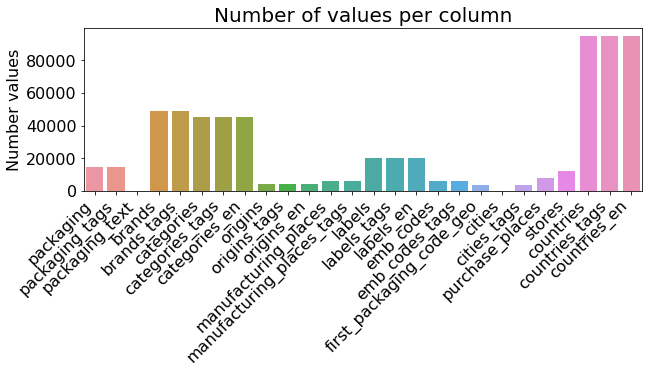

In [78]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

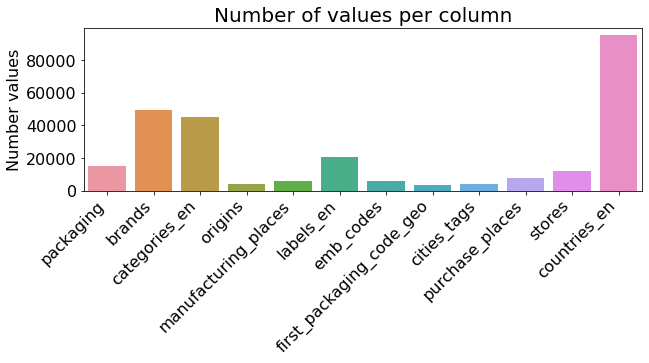

In [80]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags[tags_features].columns, y=tags[tags_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Ingredients

## Misc datas

***
# Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
63057,9.0,c,9.0
74972,4.0,c,4.0
95808,23.0,e,23.0
20478,NaN,NaN,NaN
14740,-3.0,a,-3.0
79496,NaN,NaN,NaN
77679,NaN,NaN,NaN
27302,13.0,d,13.0
56213,23.0,e,23.0
70260,NaN,NaN,NaN


In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

at least one value:  35180
nutriscore_grade recorded:  35180
all rows:  95365


We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

14


['fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'sugars_100g',
 'sodium_100g']

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

63057                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

row[col]:  Whole grain blend (rye flakes, rolled oats, oat flakes), enriched unbleached wheat flour (niacin, reduced iron, thiamine mononitrate [vitamin b1], riboflavin [vitamin b2], folic acid), canola oil, whole grain wheat flour, brown sugar, enriched bleached wheat flour (bleached wheat flour (bleached wheat flour, malted barley flour, niacin, reduced iron, thiamine mononitrate [vitamin b1], riboflavin [vitamin b2], folic acid), sugar, contains less than 2% of: oat fiber, molasses, invert sugar, salt, baking soda, malt syrup (from barley), cinnamon, soy lecithin, datem, sodium acid pyrophosphate, natural flavor, niacinamide, pyridoxine (vitamin b6), riboflavin (vitamin b2), thiamine mononitrate (vitamin b1), folic acid, cobalamin (vitamin b 12).
row[col]:  Crust: enriched flour (wheat flour, malted barley flour, niacin, ferrous sulfate, thiamine mononitrate, riboflavin, folic acid), water, soybean oil, sugar, yeast, salt, baking powder (cornstarch, sodium bicarbonate, sodium alumin

63057    None
74972    None
95808    None
20478    None
14740    None
79496    None
27302    None
56213    None
33216    None
33065    None
dtype: object

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.